**<font size="5">Applied Statistics</font>**

<font size="3">MSc in High Performance Computing Engineering, Computer Science and Engineering, Physics Engineering - A.Y. 2024-2025</font>

Prof. Mario Beraha - Dott. Vittorio Torri

---

<font size="4">**Lab 3 - Hierarchical clustering**</font>

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, cophenet, fcluster
from scipy.spatial.distance import pdist, squareform, cdist
from mpl_toolkits.mplot3d import Axes3D  # for 3D plots
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Hierarchical Clustering

## Iris dataset

### Load and plot

In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
iris4 = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
species_name = iris_data.target
iris = iris4.copy()
iris['target'] = species_name
iris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [ ]:
species_name

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

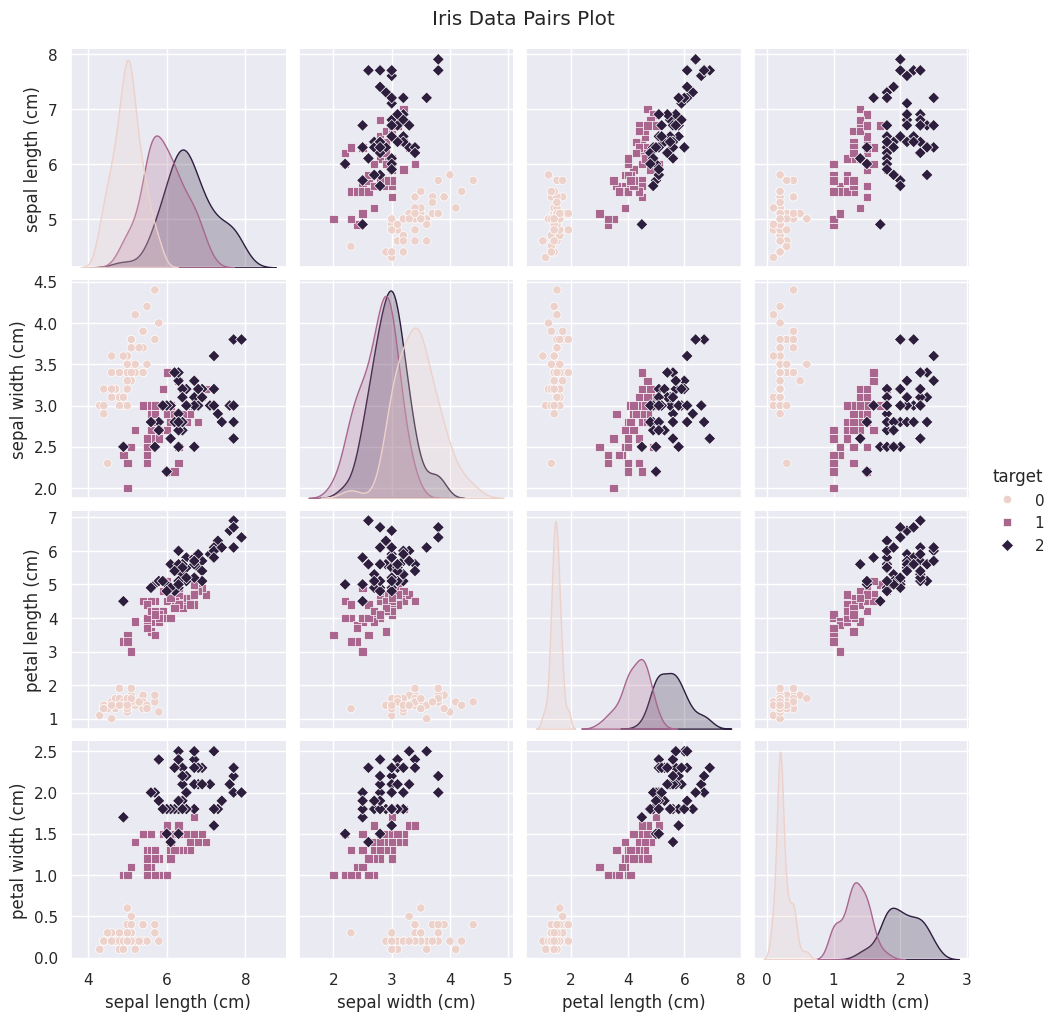

In [ ]:
sns.pairplot(iris, hue="target", diag_kind="kde", markers=["o", "s", "D"])

plt.suptitle("Iris Data Pairs Plot", y=1.02)
plt.show()

### Dissimilarity matrix

Euclidean distance

$$
d_{\text{Euclidean}}(x_i, x_j) = \sqrt{\sum_{k=1}^{p} (x_{ik} - x_{jk})^2}
$$


In [ ]:
help(pdist)

Help on function pdist in module scipy.spatial.distance:

pdist(X, metric='euclidean', *, out=None, **kwargs)
    Pairwise distances between observations in n-dimensional space.
    
    See Notes for common calling conventions.
    
    Parameters
    ----------
    X : array_like
        An m by n array of m original observations in an
        n-dimensional space.
    metric : str or function, optional
        The distance metric to use. The distance function can
        be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
        'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
        'jaccard', 'jensenshannon', 'kulczynski1',
        'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath',
        'sqeuclidean', 'yule'.
    out : ndarray, optional
        The output array.
        If not None, condensed distance matrix Y is stored in this array.
    **kwargs : dict, optional
        Extra arguments to `

In [3]:
#distance matrix between each point d(xi,xj) using euc distance dij​= sqrt(k=1->p)∑​(xik​−xjk​)^2)
iris_e = pdist(iris4, metric='euclidean')
plt.imshow(squareform(iris_e), aspect='equal')
plt.title("Euclidean Distance Matrix for Iris")
plt.xlabel("i")
plt.ylabel("j")
plt.show()

#the level of distance of the first 50 points  (target 0) from themselfes changes from the second 50-150 points (other two classes:1,2)

NameError: name 'iris4' is not defined

Other metrics: Manhattan and Canberra

$$
d_{\text{Manhattan}}(x_i, x_j) = \sum_{k=1}^{p} |x_{ik} - x_{jk}|
$$

$$
d_{\text{Canberra}}(x_i, x_j) = \sum_{k=1}^{p} \frac{|x_{ik} - x_{jk}|}{|x_{ik}| + |x_{jk}|}
$$

Manhattan distance is less sensitive to high-dimensionality than Euclidean distance (L2 norm) and less sensitive to outliers.

The fraction in Canberra distance magnifies the impact of small differences when absolute values are small


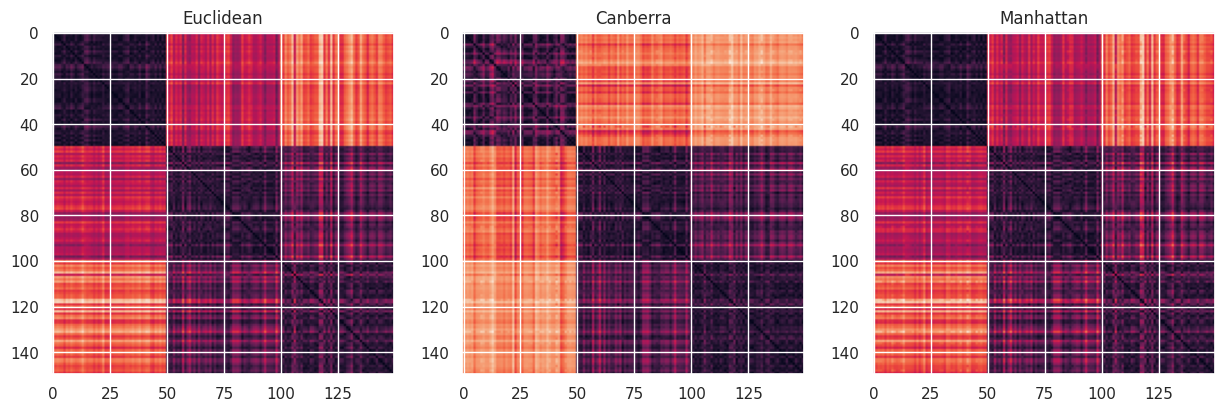

In [ ]:
#iris4 is the dataset with only the numerical values
iris_m = pdist(iris4, metric='cityblock')
iris_c = pdist(iris4, metric='canberra') #more sensitive to small distances between data, indeed it distinguish class 1 to class 2 since they are similar

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(squareform(iris_e), aspect='equal')
axs[0].set_title("Euclidean")
axs[1].imshow(squareform(iris_c), aspect='equal')
axs[1].set_title("Canberra")
axs[2].imshow(squareform(iris_m), aspect='equal')
axs[2].set_title("Manhattan")
plt.show()

But the data should not be ordered according to labels. Let's shuffle them:

In [ ]:
#LETS SHUFFLE THE DATA
np.random.seed(42)
iris = iris.sample(frac=1)
iris4 = iris.drop('target', axis=1)

In [ ]:
iris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
73                 6.1               2.8                4.7               1.2   
18                 5.7               3.8                1.7               0.3   
118                7.7               2.6                6.9               2.3   
78                 6.0               2.9                4.5               1.5   
76                 6.8               2.8                4.8               1.4   
..                 ...               ...                ...               ...   
71                 6.1               2.8                4.0               1.3   
106                4.9               2.5                4.5               1.7   
14                 5.8               4.0                1.2               0.2   
92                 5.8               2.6                4.0               1.2   
102                7.1               3.0                5.9               2.1   

     target  
73        1  
18        0  
118       2  
78        1  
76        1  
..      ...  
71        1  
106       2  
14        0  
92        1  
102       2  

[150 rows x 5 columns]

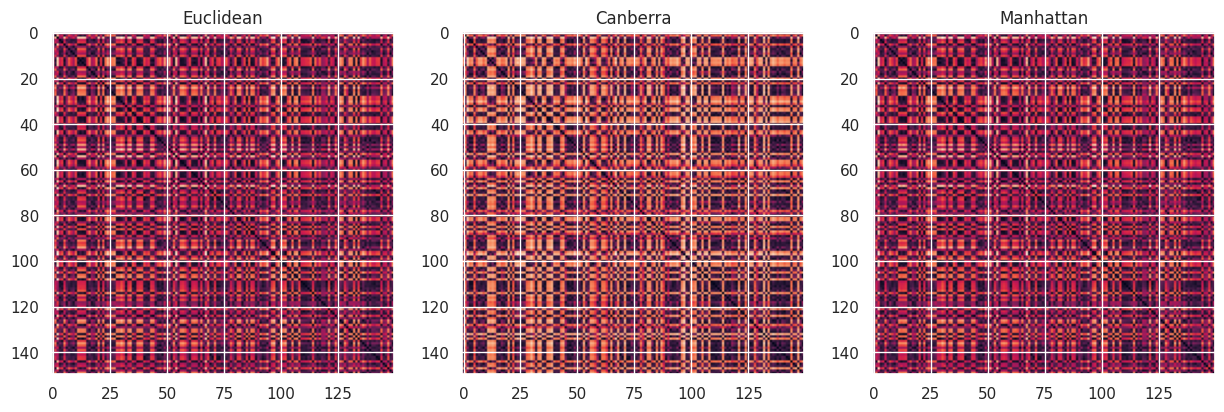

In [ ]:
#with shuffled data is impossible to understand something, it is useful when we have "ordered data" by some target (not a general case :())
iris_e = pdist(iris4, metric='euclidean')
iris_m = pdist(iris4, metric='cityblock')
iris_c = pdist(iris4, metric='canberra')

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(squareform(iris_e), aspect='equal')
axs[0].set_title("Euclidean")
axs[1].imshow(squareform(iris_c), aspect='equal')
axs[1].set_title("Canberra")
axs[2].imshow(squareform(iris_m), aspect='equal')
axs[2].set_title("Manhattan")
plt.show()

### Hierarchical clustering

Single linkage tends to form long, chain-like clusters. Works well for data where clusters are naturally spread out .

Complete linkage ensures clusters are tight and well-defined, finding more easily spherical clusters and naturally resisting outliers. Might over-fragment data when clusters have a natural spread.

Average linkage is less sensitive to outliers compared to single linkage but more flexible than complete linkage.

In [4]:
#AGGLOMERATIVE: we start with n point (clusters), and every step we merge 2 clusters in 1 according to a linkage-method
#first of all we compute  the distance matrix : iris_e
iris_es = linkage(iris_e, method='single') #single => minimum distance between the points of the two clusters
iris_ea = linkage(iris_e, method='average') #distance of the centroids
iris_ec = linkage(iris_e, method='complete') #max dist



NameError: name 'iris_e' is not defined

NameError: name 'iris_es' is not defined

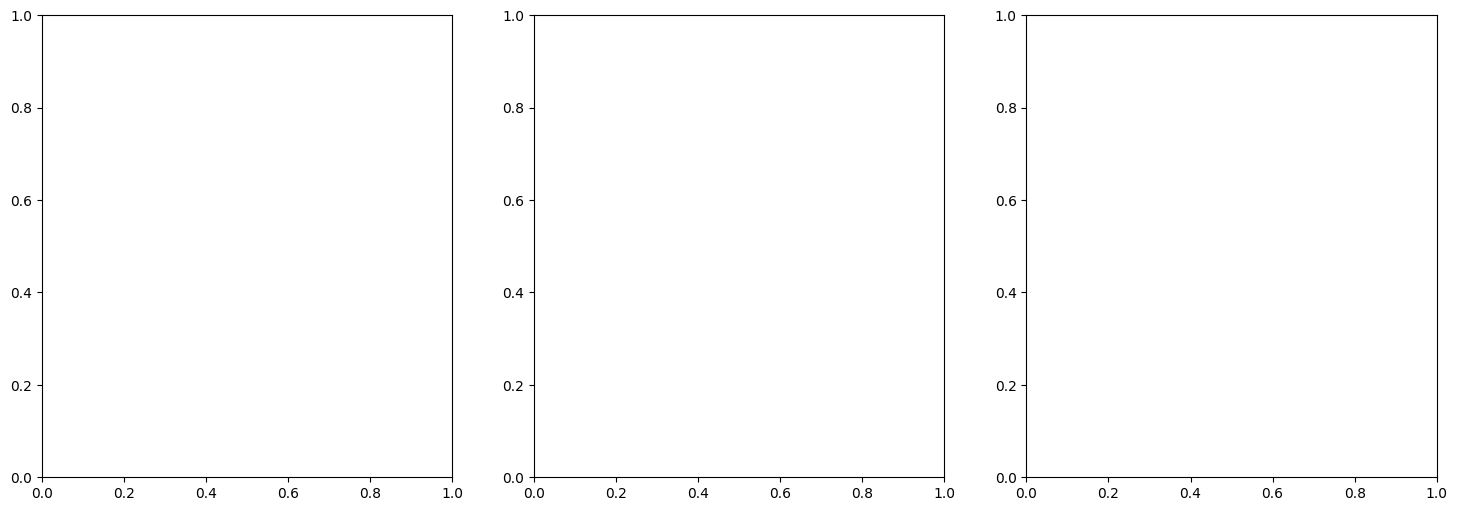

In [5]:
# Plot dendrograms: starting from n points clusters we merge every time two clusters depending on the linkage method that we use
fig, axs = plt.subplots(1, 3, figsize=(18,6))
dendrogram(iris_es, ax=axs[0], no_labels=True)
axs[0].set_title("Euclidean-Single")
dendrogram(iris_ec, ax=axs[1], no_labels=True)
axs[1].set_title("Euclidean-Complete")
dendrogram(iris_ea, ax=axs[2], no_labels=True)
axs[2].set_title("Euclidean-Average")
plt.show()

Looking to the 3 dendograms we can understand that, with an appropiate cut:
1. Euclidean-Single spots 2 cluster
2.-3. Euclidean-Complete (cut level k = 3.5 )/Average ( k = less than 2)spots 3 cluster

From the documentation of the scipy dendogram function:

```
   For brevity, let t  be the color_threshold. Colors all the descendent links below a cluster node the same color if is the first node below the cut threshold t.
   All links connecting nodes with distances greater than or equal to the threshold are colored with the default matplotlib color 'C0'.
   If t is less than or equal to zero, all nodes are colored 'C0'. If color_threshold is None or ‘default’, corresponding with MATLAB(TM) behavior, the threshold is set to 0.7*max(Z[:,2]).
```



Cut the dendrograms into 2 clusters:

In [6]:
cluster_ec = cut_tree(iris_ec, n_clusters=2).flatten()
cluster_es = cut_tree(iris_es, n_clusters=2).flatten()
cluster_ea = cut_tree(iris_ea, n_clusters=2).flatten()

NameError: name 'iris_ec' is not defined

In [ ]:
cluster_ea

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

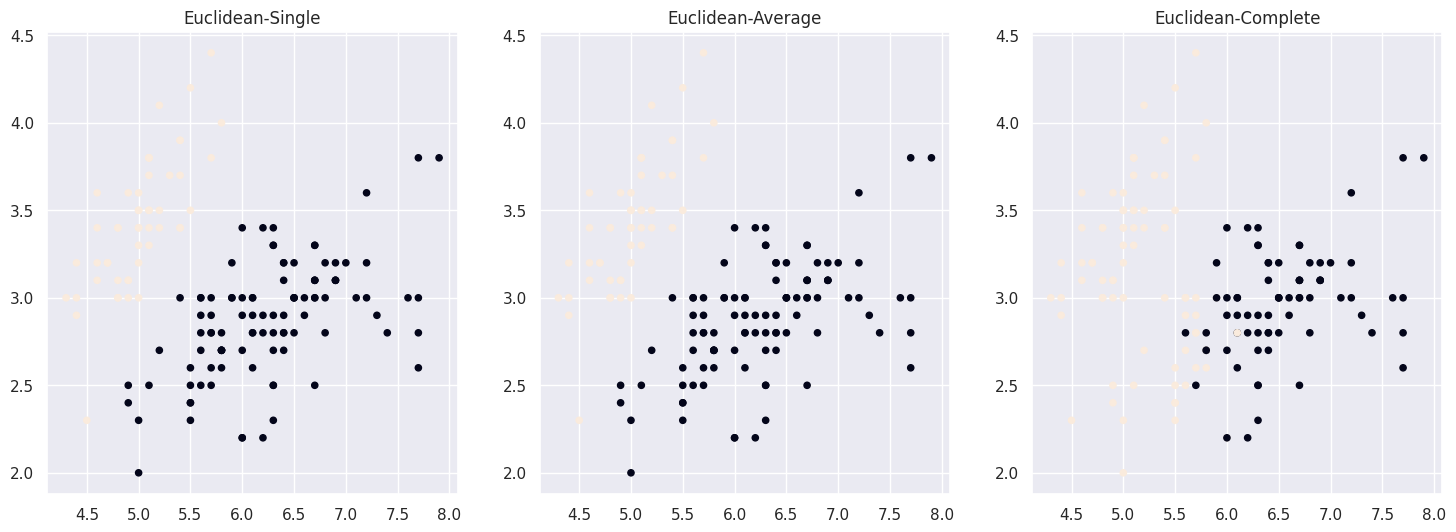

In [ ]:
## TODO - Interpret the clusters
fig, axs = plt.subplots(1, 3, figsize=(18,6))
axs[0].scatter(iris4.iloc[:,0], iris4.iloc[:,1], c=cluster_es, s=20)
axs[0].set_title("Euclidean-Single")
axs[1].scatter(iris4.iloc[:,0], iris4.iloc[:,1], c=cluster_ea, s=20)
axs[1].set_title("Euclidean-Average")
axs[2].scatter(iris4.iloc[:,0], iris4.iloc[:,1], c=cluster_ec, s=20)
axs[2].set_title("Euclidean-Complete")
plt.show()

In [ ]:
print(pd.crosstab(species_name, cluster_es))
print(pd.crosstab(species_name, cluster_ea))
print(pd.crosstab(species_name, cluster_ec))

col_0   0   1
row_0        
0      31  19
1      32  18
2      37  13
col_0   0   1
row_0        
0      31  19
1      32  18
2      37  13
col_0   0   1
row_0        
0      26  24
1      19  31
2      27  23


In [ ]:
## TODO - repeat with 3 clusters
cluster_ec = cut_tree(iris_ec, n_clusters=3).flatten()
cluster_es = cut_tree(iris_es, n_clusters=3).flatten()
cluster_ea = cut_tree(iris_ea, n_clusters=3).flatten()

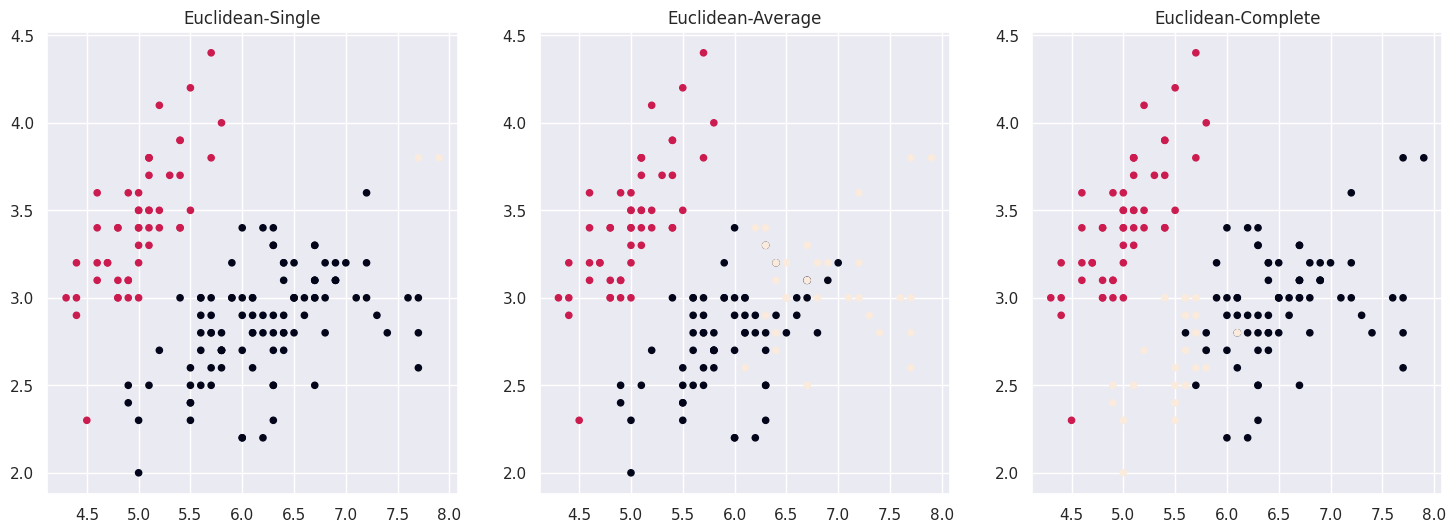

In [ ]:
## TODO - Interpret the clusters
fig, axs = plt.subplots(1, 3, figsize=(18,6))
axs[0].scatter(iris4.iloc[:,0], iris4.iloc[:,1], c=cluster_es, s=20)
axs[0].set_title("Euclidean-Single")
axs[1].scatter(iris4.iloc[:,0], iris4.iloc[:,1], c=cluster_ea, s=20)
axs[1].set_title("Euclidean-Average")
axs[2].scatter(iris4.iloc[:,0], iris4.iloc[:,1], c=cluster_ec, s=20)
axs[2].set_title("Euclidean-Complete")
plt.show()

Fix k=2 clusters

In [ ]:
cluster_ec = cut_tree(iris_ec, n_clusters=2).flatten()
cluster_es = cut_tree(iris_es, n_clusters=2).flatten()
cluster_ea = cut_tree(iris_ea, n_clusters=2).flatten()

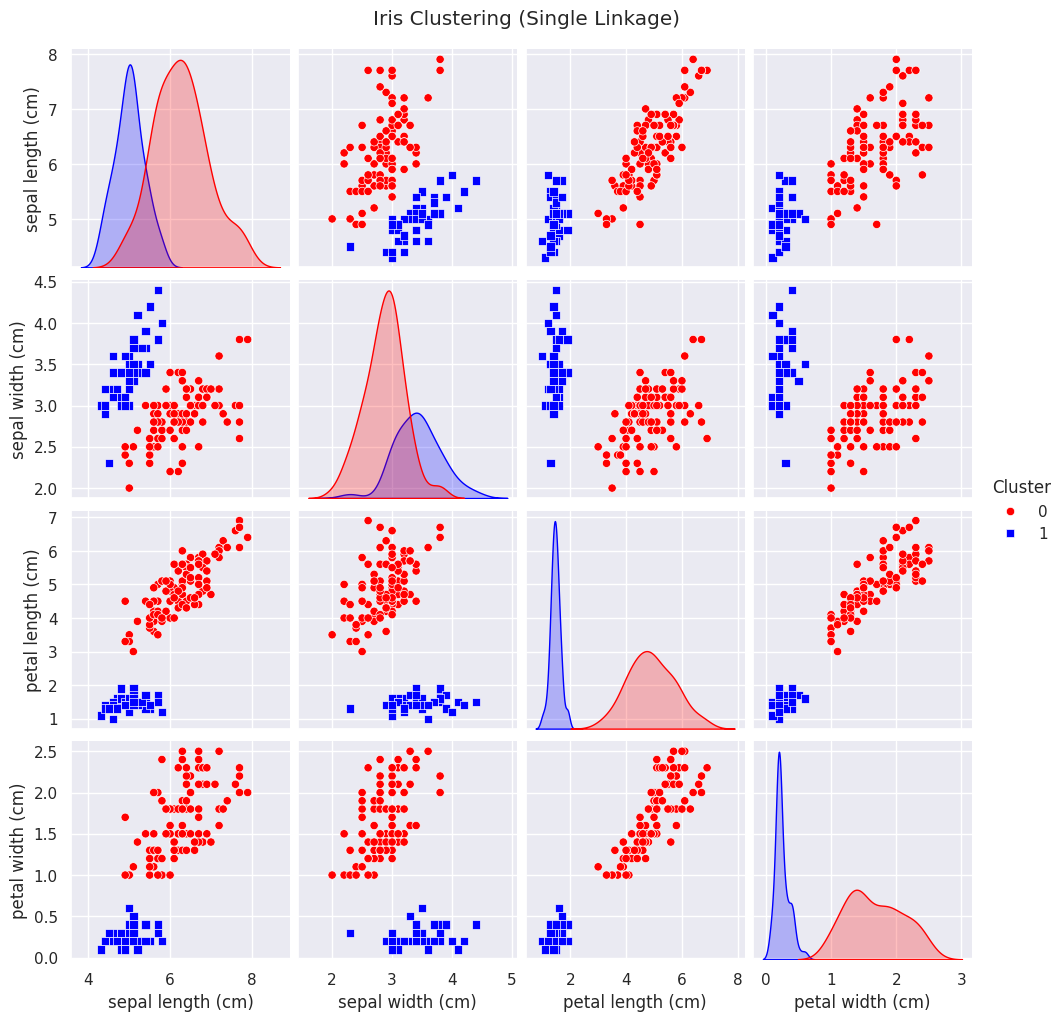

In [ ]:
iris4['Cluster'] = cluster_es
palette = {0: 'red', 1: 'blue'}
sns.pairplot(iris4, hue="Cluster", diag_kind="kde", palette=palette, markers=["o", "s"])
plt.suptitle("Iris Clustering (Single Linkage)", y=1.02)
plt.show()

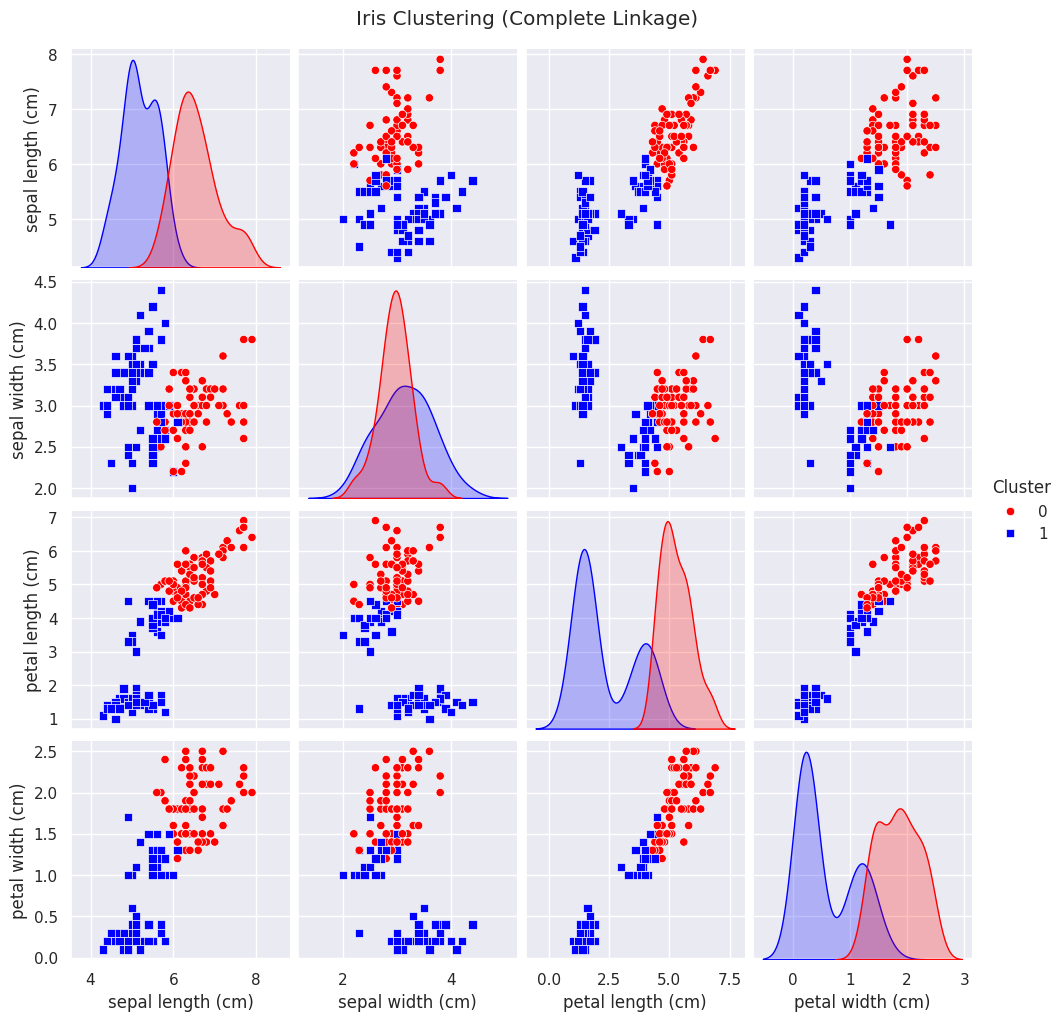

In [ ]:
iris4['Cluster'] = cluster_ec
palette = {0: 'red', 1: 'blue'}
sns.pairplot(iris4, hue="Cluster", diag_kind="kde", palette=palette, markers=["o", "s"])
plt.suptitle("Iris Clustering (Complete Linkage)", y=1.02)
plt.show()

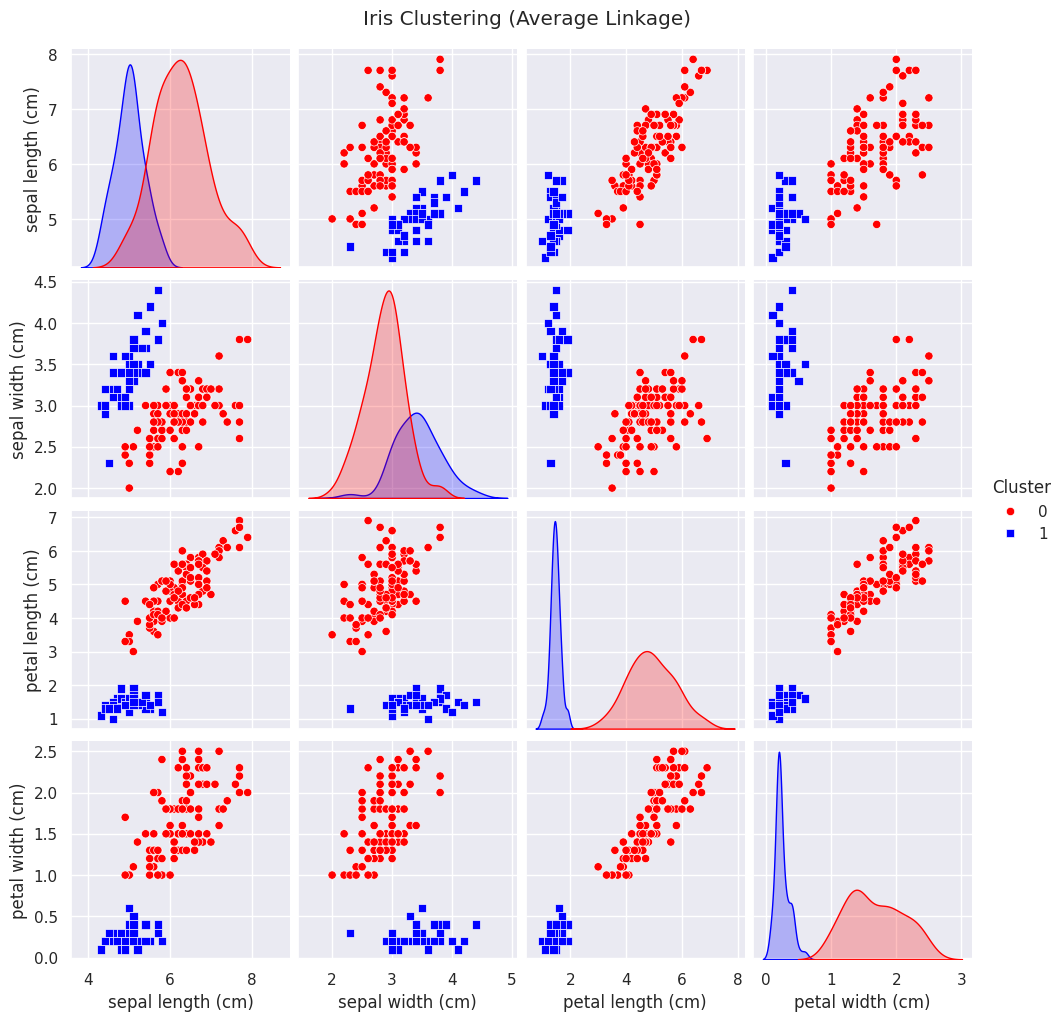

In [ ]:
iris4['Cluster'] = cluster_ea
palette = {0: 'red', 1: 'blue'}
sns.pairplot(iris4, hue="Cluster", diag_kind="kde", palette=palette, markers=["o", "s"])
plt.suptitle("Iris Clustering (Average Linkage)", y=1.02)
plt.show()

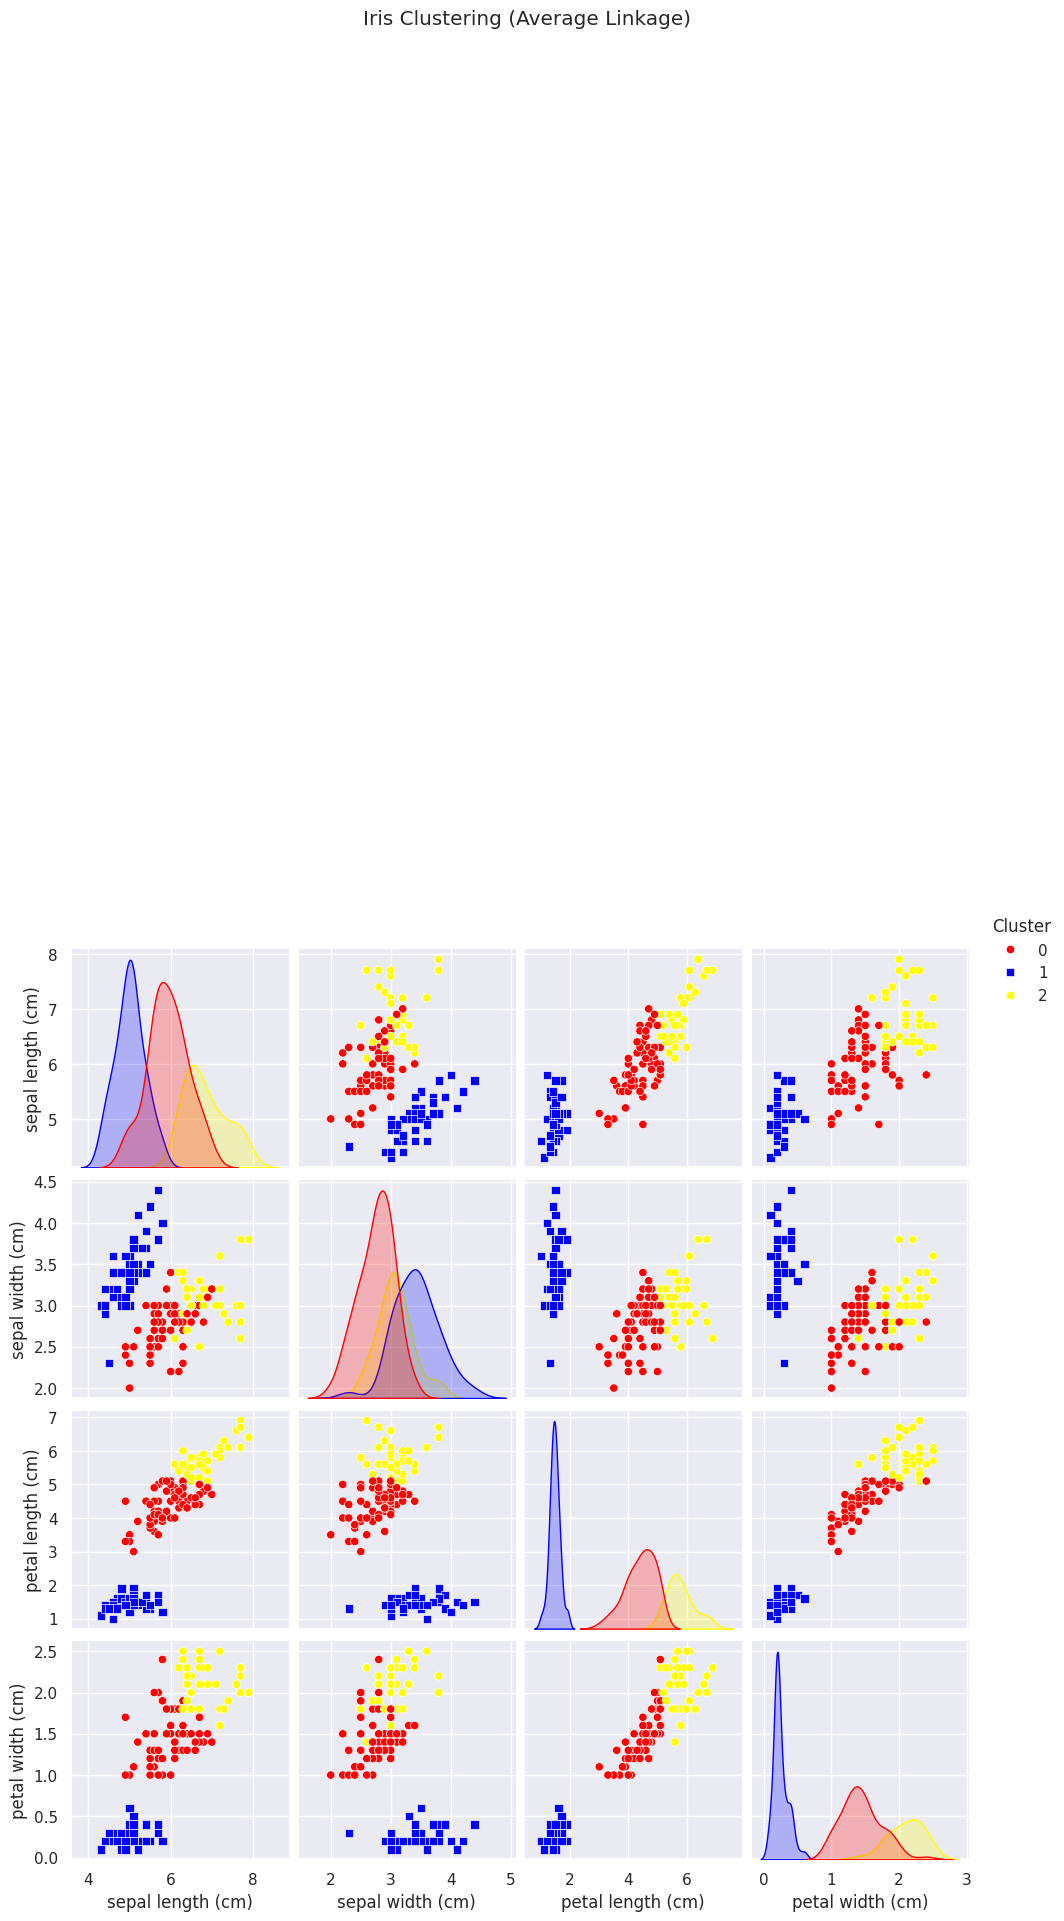

In [ ]:
cluster_ea = cut_tree(iris_ea, n_clusters=3).flatten()
iris4['Cluster'] = cluster_ea
palette = {0: 'red', 1: 'blue',2:'yellow'}
sns.pairplot(iris4, hue="Cluster", diag_kind="kde", palette=palette, markers=["o", "s"])
plt.suptitle("Iris Clustering (Average Linkage)", y=1.92)
plt.show()

### Cluster evaluation

The **cophenetic distance** between two points in a hierarchical clustering tree (dendrogram) is the height at which they are merged into the same cluster.

The **cophenetic correlation coefficient** measures how well the hierarchical clustering structure preserves the original pairwise distances, computing the correlation between $D$ and $C$

$$
CCC = \frac{\sum (d_{ij} - \bar{d})(c_{ij} - \bar{c})}{\sqrt{\sum (d_{ij} - \bar{d})^2 \sum (c_{ij} - \bar{c})^2}}
$$


with $d_{ij}$ original distances and $c_{ij}$ cophenetic distances

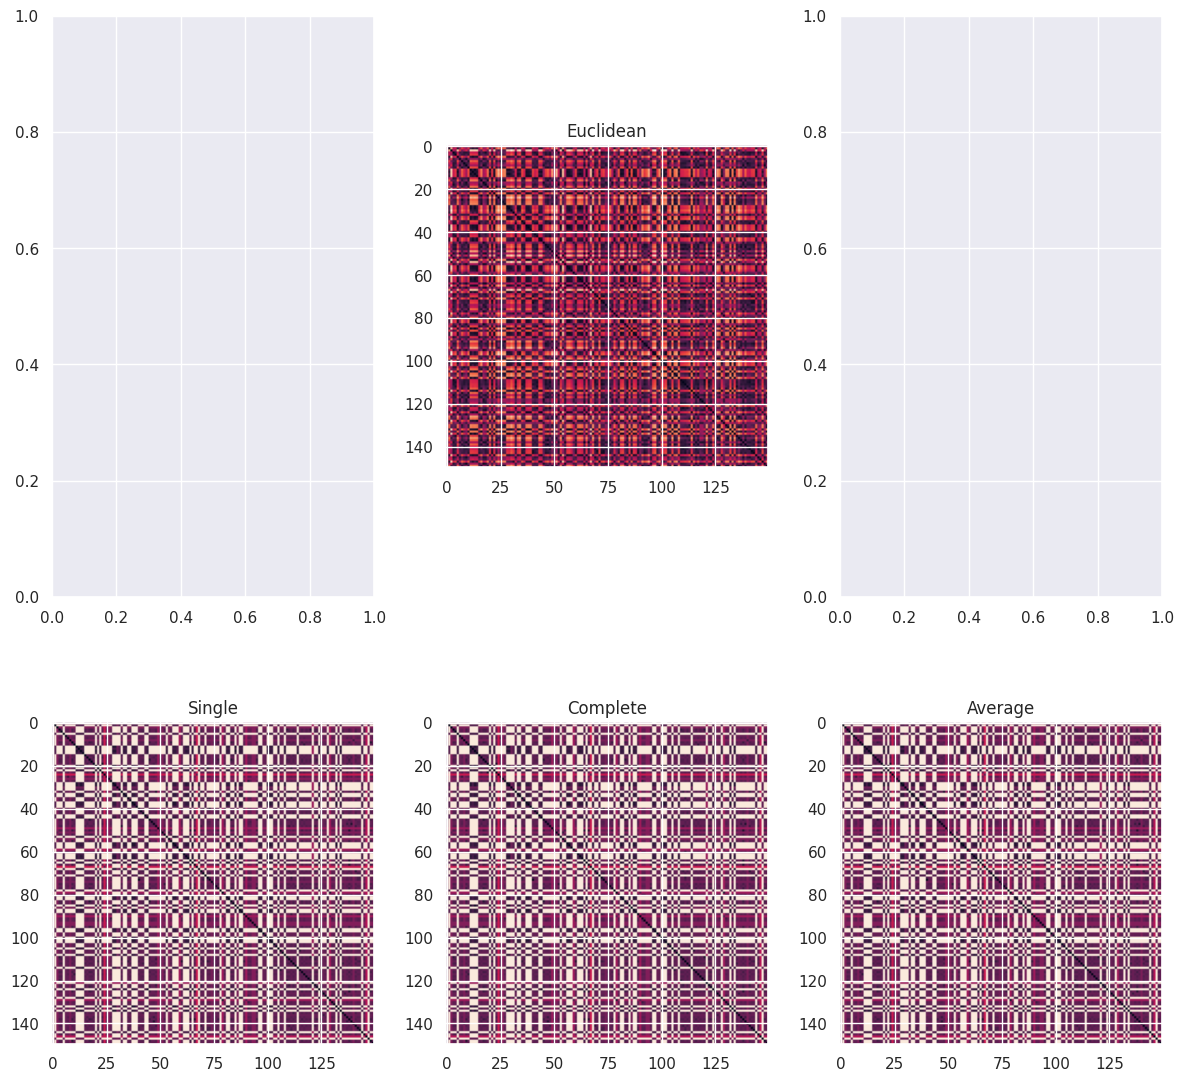

In [ ]:
# Compute cophenetic distances and coefficients
coph_es, coph_dists_es = cophenet(iris_es, iris_e)
coph_ec, coph_dists_ec = cophenet(iris_ec, iris_e)
coph_ea, coph_dists_ea = cophenet(iris_ea, iris_e)

fig, axs = plt.subplots(2, 3, figsize=(12,12))
axs[0,1].imshow(squareform(iris_e), aspect='equal')
axs[0,1].set_title("Euclidean")
axs[1,0].imshow(squareform(coph_dists_es), aspect='equal')
axs[1,0].set_title("Single")
axs[1,1].imshow(squareform(coph_dists_es), aspect='equal')
axs[1,1].set_title("Complete")
axs[1,2].imshow(squareform(coph_dists_es), aspect='equal')
axs[1,2].set_title("Average")
plt.tight_layout()
plt.show()

In [ ]:
print("Cophenetic coefficients:")
print({"Eucl-Single": coph_es, "Eucl-Complete": coph_ec, "Eucl-Average": coph_ea})

Cophenetic coefficients:
{'Eucl-Single': np.float64(0.8638786773076584), 'Eucl-Complete': np.float64(0.7276283289028812), 'Eucl-Average': np.float64(0.8769561464741981)}


Internal metrics valid for any clustering algorithm:

$$
WSS = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

$$
BSS = \sum_{k=1}^{K} |C_k| \cdot \| \mu_k - \mu \|^2
$$

WSS should be minimized (distance in points of same cluster), while BSS should be maximized (distance among clusters)

In [ ]:
def compute_internal_measures(x, merges, k_values):
    wss_values = {}
    bss_values = {}

    overall_mean = np.mean(x, axis=0)  # Compute global mean

    for k in k_values:
        clustering = fcluster(merges, k, criterion='maxclust')
        # computes centroids for all clusters
        centroids = [np.mean(x[clustering==c],axis=0) for c in range(1,k+1)]
        cluster_sizes = [len(x[clustering==c]) for c in range(1,k+1)]
        # computes the euclidean distance between each point and each centroid
        D = cdist(x, centroids, 'euclidean')
        # find nearest centroid for each point
        cIdx = np.argmin(D,axis=1)
        # store the distances to the nearest centroid
        d = np.min(D,axis=1)

        # WSS
        wss = sum(d**2)

        # BSS
        bss = np.sum([size * np.sum((centroid - overall_mean) ** 2) for size, centroid in zip(cluster_sizes, centroids)])

        wss_values[k] = wss
        bss_values[k] = bss
    return wss_values,bss_values

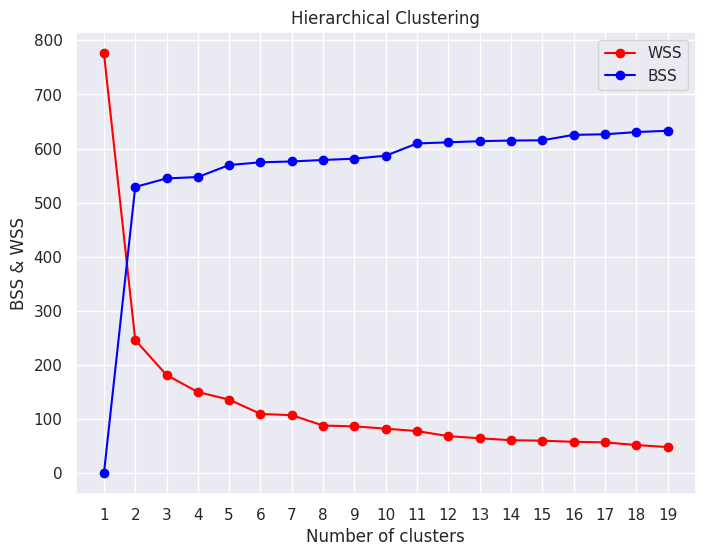

In [ ]:
k_values = range(1,20)
wss_dict, bss_dict = compute_internal_measures(iris4, iris_es, k_values)
wss_values = [wss_dict[x] for x in range(1,20)]
bss_values = [bss_dict[x] for x in range(1,20)]
fig = plt.figure(figsize=(8,6))
font = {'family' : 'sans', 'size'   : 16}
plt.rc('font', **font)
plt.plot(k_values, wss_values, 'bo-', color='red', label='WSS')
plt.plot(k_values, bss_values, 'bo-', color='blue', label='BSS')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('BSS & WSS')
plt.xticks(k_values)
plt.legend()
plt.title('Hierarchical Clustering');

### Cluster description

In [ ]:
iris4['Cluster'] = cluster_ea
iris4.groupby('Cluster').describe()

sepal length (cm)                                               \
                    count      mean       std  min  25%  50%  75%  max   
Cluster                                                                  
0                    64.0  5.929688  0.485563  4.9  5.6  5.9  6.3  7.0   
1                    50.0  5.006000  0.352490  4.3  4.8  5.0  5.2  5.8   
2                    36.0  6.852778  0.507366  6.1  6.4  6.7  7.2  7.9   

        sepal width (cm)            ... petal length (cm)       \
                   count      mean  ...               75%  max   
Cluster                             ...                          
0                   64.0  2.757812  ...             4.800  5.1   
1                   50.0  3.428000  ...             1.575  1.9   
2                   36.0  3.075000  ...             6.025  6.9   

        petal width (cm)                                               
                   count      mean       std  min  25%  50%  75%  max  
Cluster                                                                
0                   64.0  1.439062  0.294725  1.0  1.3  1.4  1.6  2.4  
1                   50.0  0.246000  0.105386  0.1  0.2  0.2  0.3  0.6  
2                   36.0  2.097222  0.262391  1.4  1.9  2.1  2.3  2.5  

[3 rows x 32 columns]

**Snake plots**

First, the data are normalized (according to the mean and the standard deviation) then we plot each cluster's average normalized values of each attribute.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_iris = scaler.fit_transform(iris4)
df_iris_normalized = pd.DataFrame(normalized_iris,columns=iris4.columns)
df_iris_normalized['Cluster'] = cluster_ea

In [ ]:
df_iris_melt = pd.melt(df_iris_normalized,
                    id_vars=['Cluster'],
                    value_vars=iris4.columns,
                    var_name='Attribute',
                    value_name='Value')
df_iris_melt

Cluster          Attribute     Value
0          0  sepal length (cm)  0.310998
1          1  sepal length (cm) -0.173674
2          2  sepal length (cm)  2.249683
3          0  sepal length (cm)  0.189830
4          0  sepal length (cm)  1.159173
..       ...                ...       ...
595        0   petal width (cm)  0.132510
596        0   petal width (cm)  0.659038
597        1   petal width (cm) -1.315444
598        0   petal width (cm)  0.000878
599        2   petal width (cm)  1.185567

[600 rows x 3 columns]

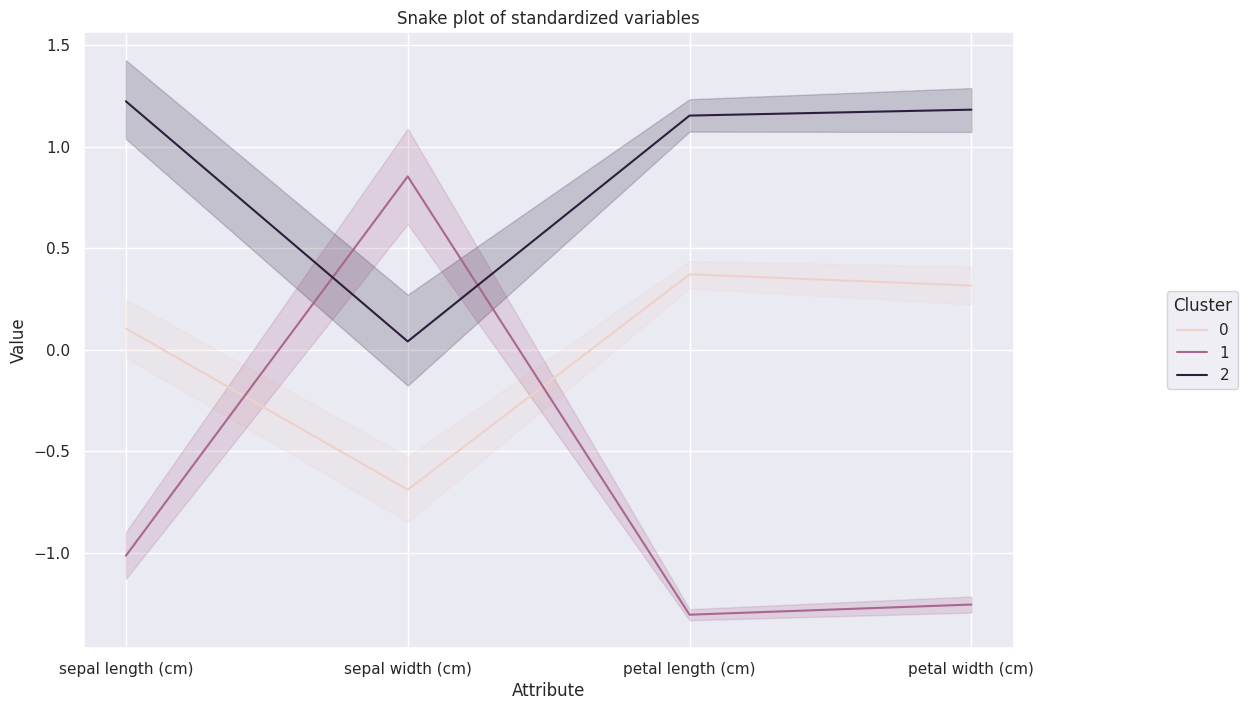

In [ ]:
plt.title('Snake plot of standardized variables') #to understand the mean value of each variable in the two clusters (with a std intervallo di confidenza )
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=df_iris_melt)
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, title='Cluster');

## Simulated data

### Univariate

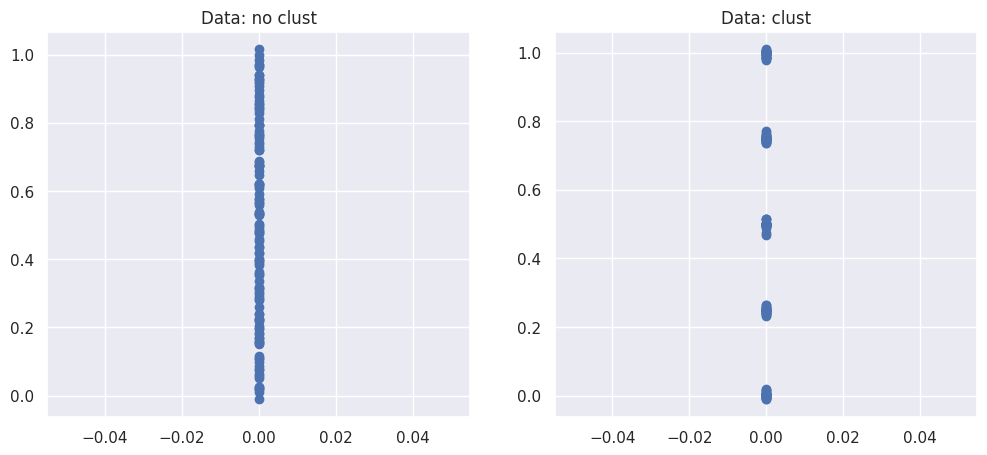

In [ ]:
np.random.seed(123)
# x : vector of NON clustered data
x = np.linspace(0, 1, 125) + np.random.normal(scale=0.01, size=125)
# y: 5 clusters of 25 points each
y = np.concatenate([np.random.normal(loc=mean, scale=0.01, size=25) for mean in [0, 0.25, 0.5, 0.75, 1]])
x = np.random.permutation(x)
y = np.random.permutation(y)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.zeros(125), x, 'o')
plt.title("Data: no clust")
plt.subplot(1,2,2)
plt.plot(np.zeros(125), y, 'o')
plt.title("Data: clust")
plt.show()

In [ ]:
dx = pdist(x.reshape(-1,1), metric='euclidean')
dy = pdist(y.reshape(-1,1), metric='euclidean')
hcx = linkage(dx, method='single')
hcy = linkage(dy, method='single')

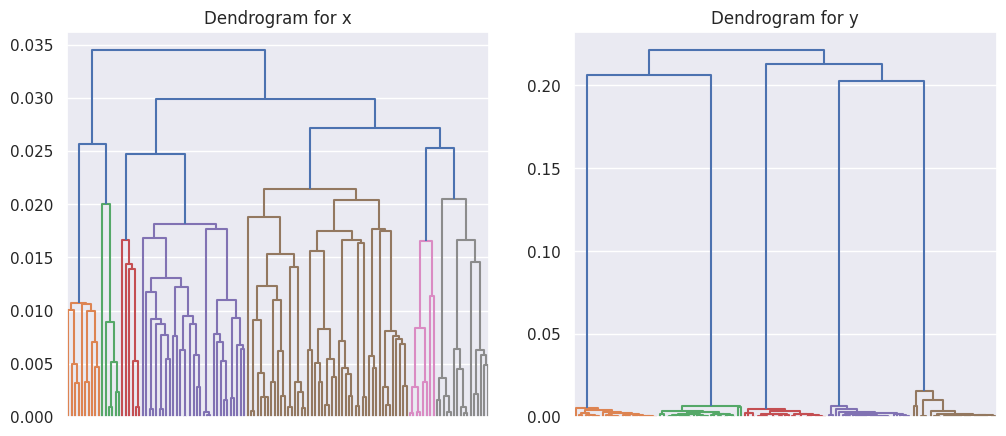

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
dendrogram(hcx, no_labels=True)
plt.title("Dendrogram for x")
plt.subplot(1,2,2)
dendrogram(hcy, no_labels=True)
plt.title("Dendrogram for y")
plt.show()

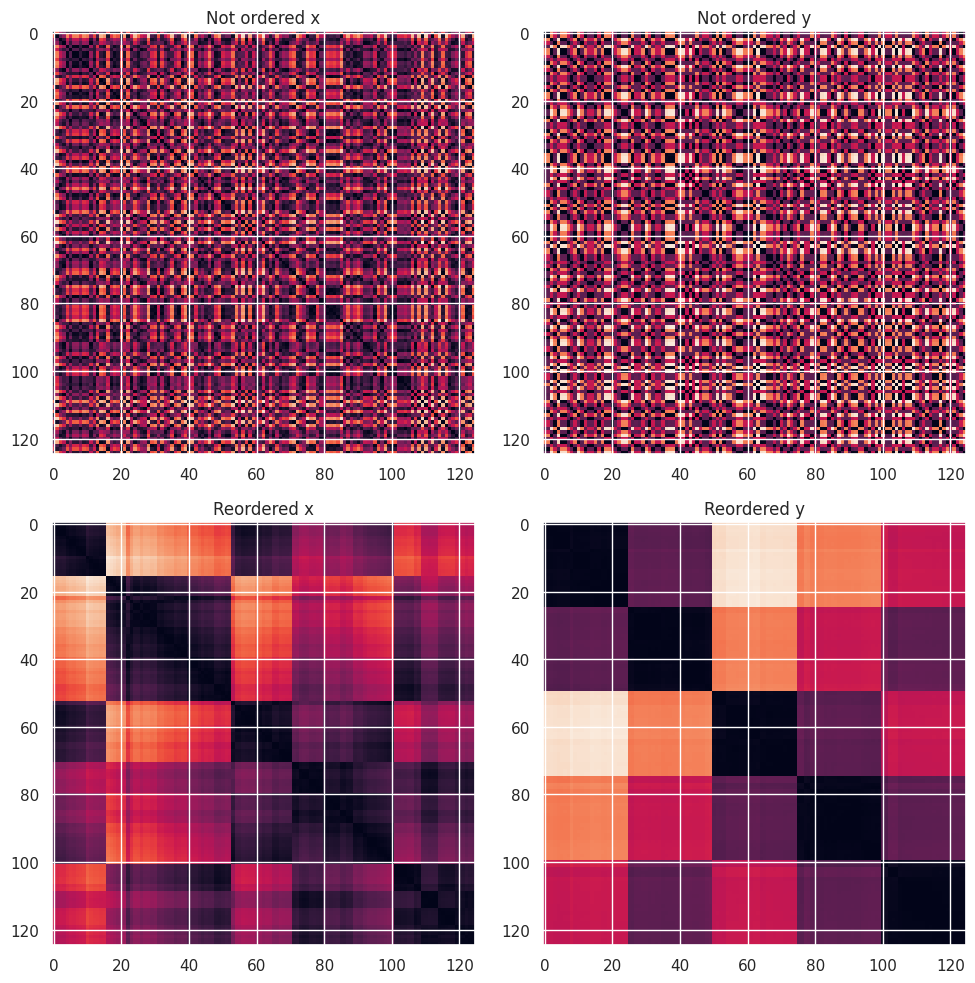

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(squareform(dx), aspect='equal')
plt.title("Not ordered x")
plt.subplot(2,2,2)
plt.imshow(squareform(dy), aspect='equal')
plt.title("Not ordered y")

order_x = dendrogram(hcx, no_plot=True)['leaves']
order_y = dendrogram(hcy, no_plot=True)['leaves']
plt.subplot(2,2,3)
plt.imshow(squareform(dx)[np.ix_(order_x, order_x)], aspect='equal')
plt.title("Reordered x")
plt.subplot(2,2,4)
plt.imshow(squareform(dy)[np.ix_(order_y, order_y)], aspect='equal')
plt.title("Reordered y")
plt.tight_layout()
plt.show()

### Bivariate 1

Chaining effect with single linkage

In [ ]:
p = 2
n = 100
mu1 = [0, 1]
mu2 = [5, 1.2]
sig = np.eye(p)
np.random.seed(1)
X1 = np.random.multivariate_normal(mu1, sig, n)
X2 = np.random.multivariate_normal(mu2, sig, n)
X = np.vstack([X1, X2])

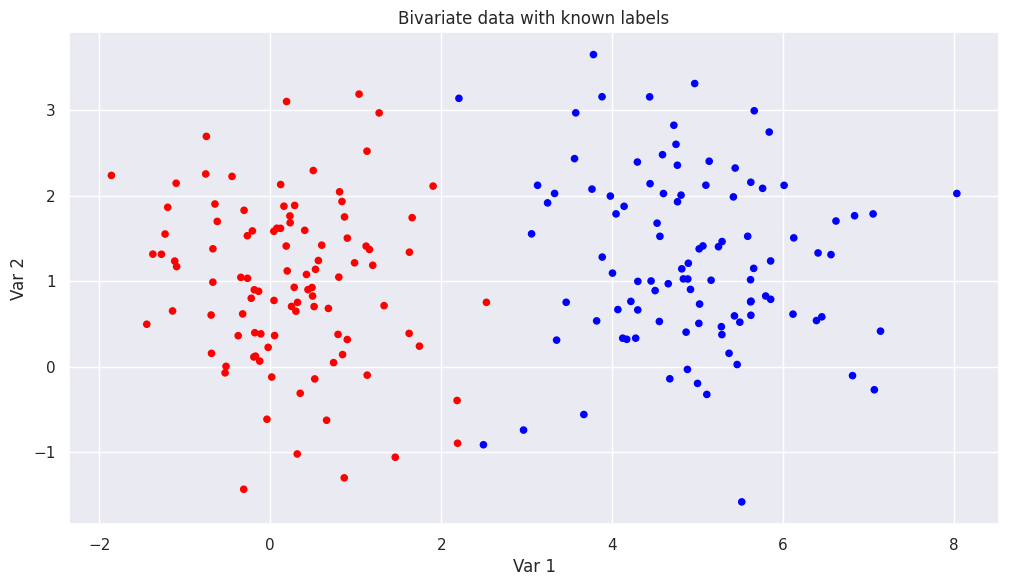

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=np.repeat(['red','blue'], n), s=20)
plt.xlabel("Var 1")
plt.ylabel("Var 2")
plt.title("Bivariate data with known labels")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

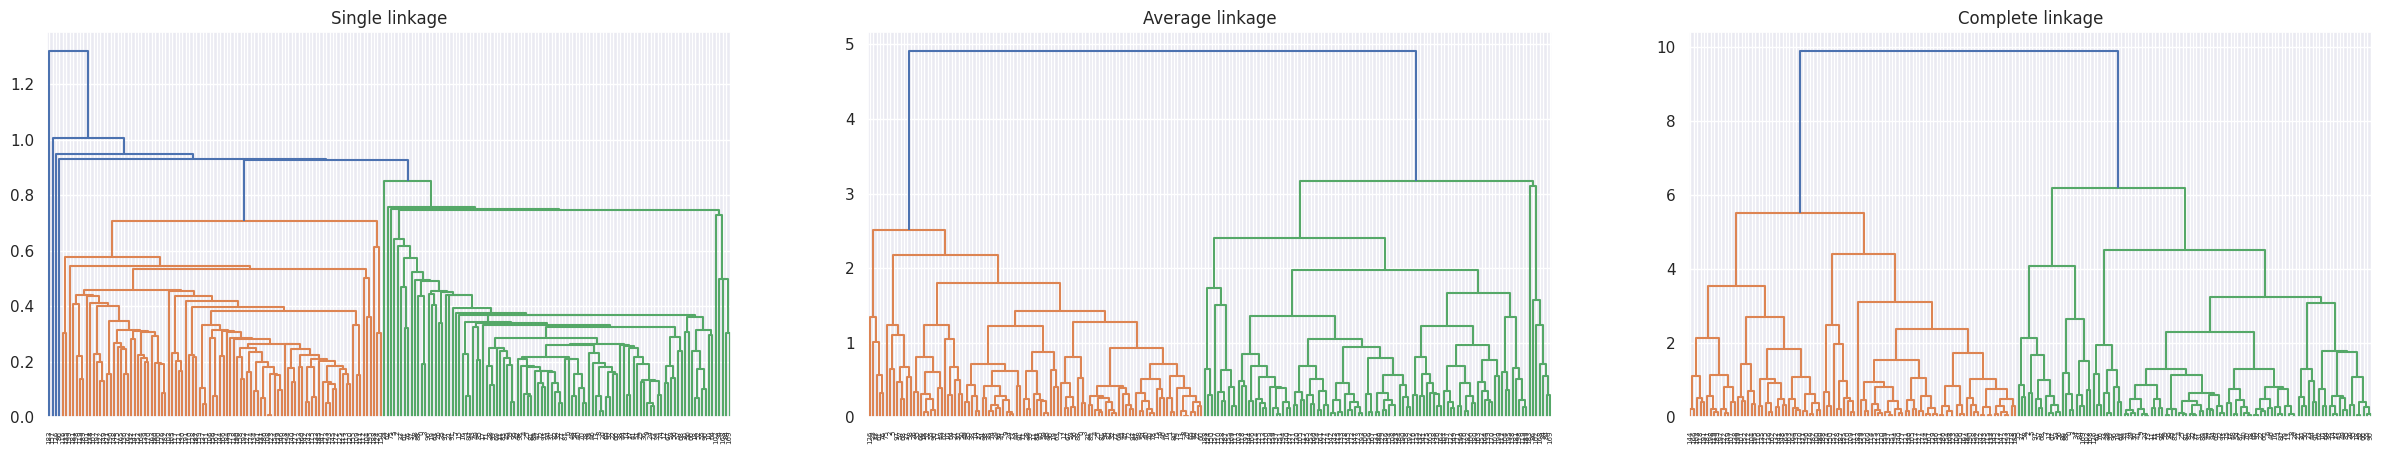

In [ ]:
## TODO apply hierarchical clustering with different linkages
x_es = linkage(pdist(X, metric='euclidean'), method='single')
x_ea = linkage(pdist(X, metric='euclidean'), method='average')
x_ec = linkage(pdist(X, metric='euclidean'), method='complete')

#Plot Dendograms
fig, axs = plt.subplots(1,3, figsize=(30,5))
dendrogram(x_es, ax=axs[0], no_labels=False)
axs[0].set_title("Single linkage")
dendrogram(x_ea, ax=axs[1], no_labels=False)
axs[1].set_title("Average linkage")
dendrogram(x_ec, ax=axs[2], no_labels=False)
axs[2].set_title("Complete linkage")
plt.show()

In [ ]:
# Cut the dendrogram to get 2 clusters
cluster_es = cut_tree(x_es, n_clusters=2).flatten()
cluster_ea = cut_tree(x_ea, n_clusters=2).flatten()
cluster_ec = cut_tree(x_ec, n_clusters=2).flatten()

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].scatter(X[:,0], X[:,1], c=np.where(cluster_es==0, 'red','blue'), s=20)
axs[0].set_title("Single linkage clusters")
axs[1].scatter(X[:,0], X[:,1], c=np.where(cluster_ea==0, 'red','blue'), s=20)
axs[1].set_title("Average linkage clusters")
axs[2].scatter(X[:,0], X[:,1], c=np.where(cluster_ec==0, 'red','blue'), s=20)
axs[2].set_title("Complete linkage clusters")
for ax in axs:
    ax.set_aspect('equal', adjustable='box')
plt.show()

NameError: name 'cut_tree' is not defined

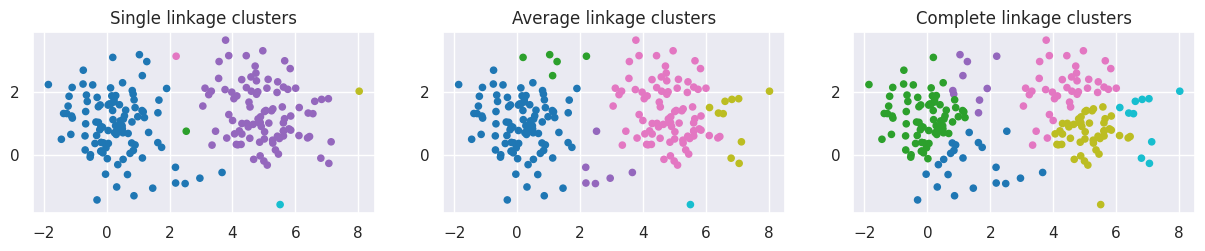

In [ ]:
# Cut the dendrogram to get more clusters
k=6
cmap = plt.get_cmap('tab10')

cluster_es = cut_tree(x_es, n_clusters=k).flatten()
cluster_ea = cut_tree(x_ea, n_clusters=k).flatten()
cluster_ec = cut_tree(x_ec, n_clusters=k).flatten()

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].scatter(X[:,0], X[:,1], c=cluster_es, cmap=cmap, s=20)
axs[0].set_title("Single linkage clusters")
axs[1].scatter(X[:,0], X[:,1], c=cluster_ea, cmap=cmap, s=20)
axs[1].set_title("Average linkage clusters")
axs[2].scatter(X[:,0], X[:,1], c=cluster_ec, cmap=cmap, s=20)
axs[2].set_title("Complete linkage clusters")
for ax in axs:
    ax.set_aspect('equal', adjustable='box')
plt.show()

### Bivariate 2

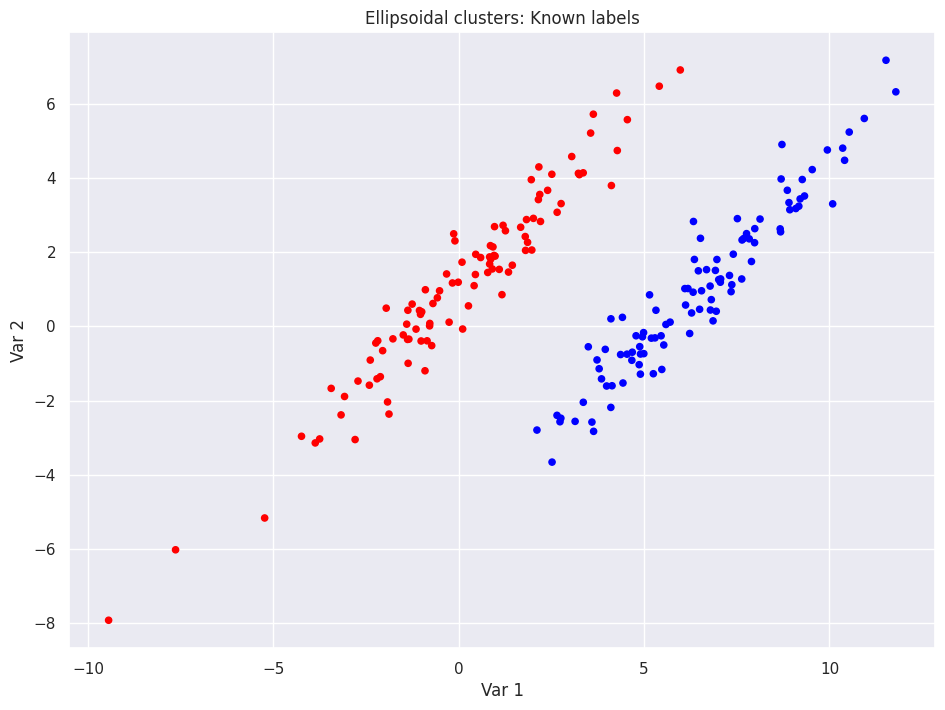

In [ ]:
p = 2
n = 100
mu1 = [0, 1]
mu2 = [6.5, 1]
e1 = np.array([1, 1])
e2 = np.array([-1, 1])
sig = 5 * np.outer(e1, e1) + 0.1 * np.outer(e2, e2)
np.random.seed(2)
X1 = np.random.multivariate_normal(mu1, sig, n)
X2 = np.random.multivariate_normal(mu2, sig, n)
X = np.vstack([X1, X2])
plt.figure()
plt.scatter(X[:,0], X[:,1], c=np.repeat(['red','blue'], n), s=20)
plt.xlabel("Var 1")
plt.ylabel("Var 2")
plt.title("Ellipsoidal clusters: Known labels")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

 fatica a riconoscere un dataset ellissoidale è legato alla forma e alla geometria dei cluster, che non sono sferici o lineari.
 'Agglomerative Clustering utilizza una matrice di distanze per unire i punti, basandosi su criteri come la distanza minima o massima tra cluster. Tuttavia, questa tecnica è ottimizzata per identificare cluster separati in modo relativamente netto (ad esempio, cluster sferici o globulari), ma non è naturalmente progettata per identificare forme più complesse, come cluster ellissoidali.

 Inoltre sono presenti outliers che rende piu complicato in generale il procediment.

In [ ]:
#### TODO: apply hierarchical clustering with different linkages

In [ ]:
x_d = pdist(X, metric='euclidean')
x_es = linkage(x_d, method='single')
x_ea = linkage(x_d, method='average')
x_ec = linkage(x_d, method='complete')

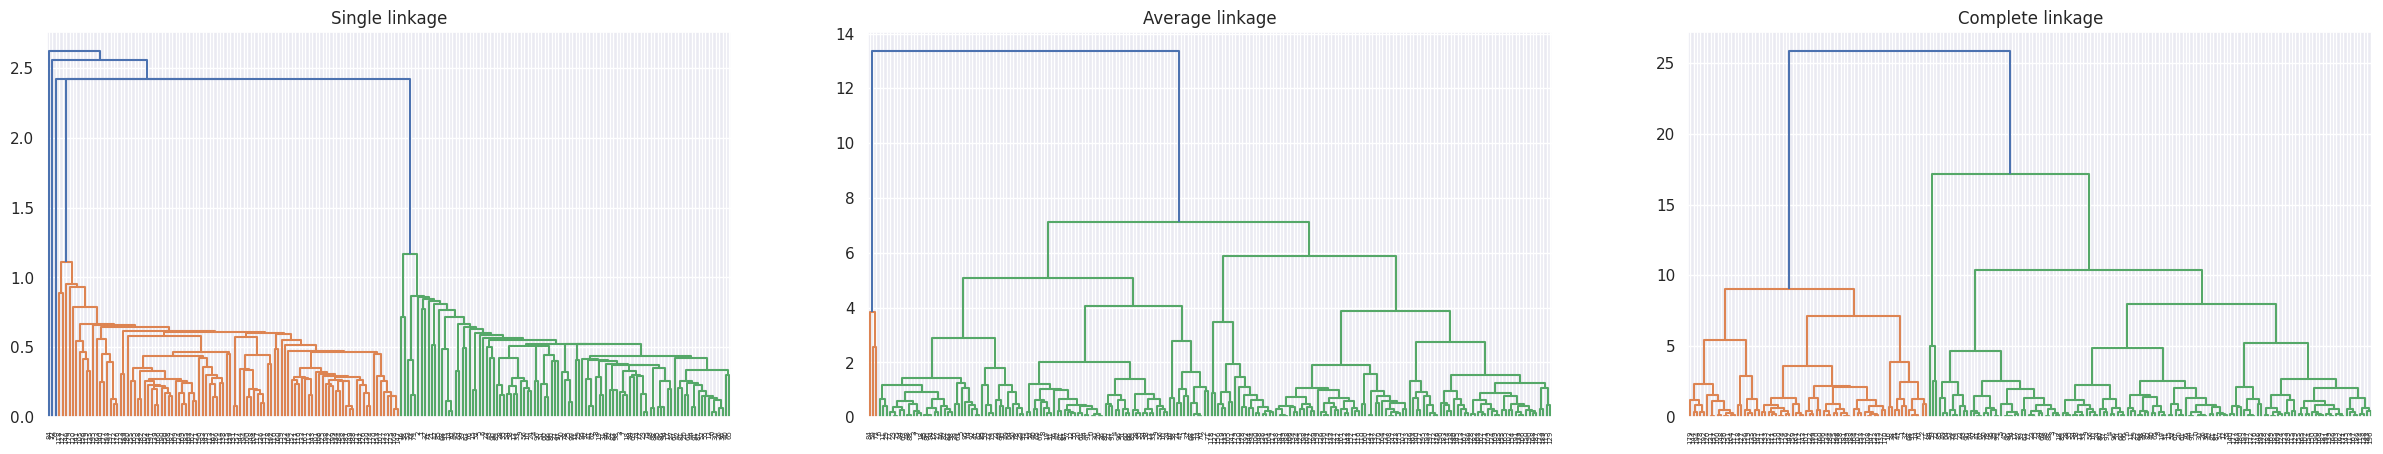

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(30,5))
dendrogram(x_es, ax=axs[0], no_labels=False)
axs[0].set_title("Single linkage")
dendrogram(x_ea, ax=axs[1], no_labels=False)
axs[1].set_title("Average linkage")
dendrogram(x_ec, ax=axs[2], no_labels=False)
axs[2].set_title("Complete linkage")
plt.show()

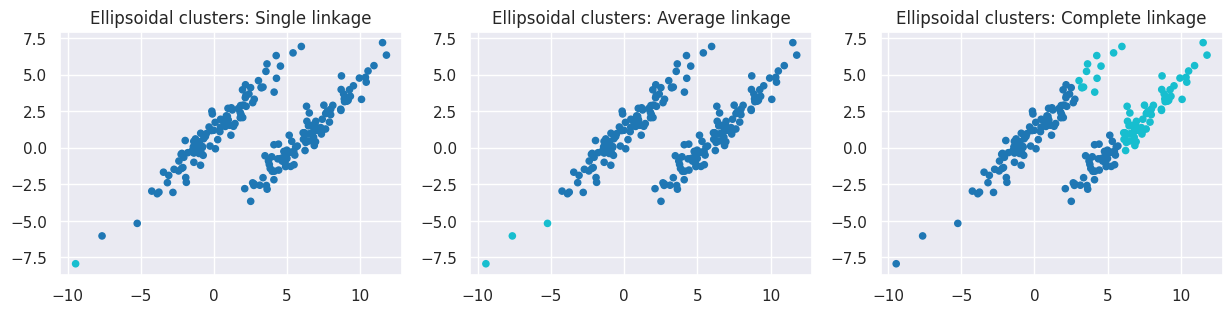

In [ ]:
k=2
cluster_es = cut_tree(x_es, n_clusters=k).flatten()
cluster_ea = cut_tree(x_ea, n_clusters=k).flatten()
cluster_ec = cut_tree(x_ec, n_clusters=k).flatten()

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].scatter(X[:,0], X[:,1], c=cluster_es+1, s=20, cmap='tab10')
axs[0].set_title("Ellipsoidal clusters: Single linkage")
axs[1].scatter(X[:,0], X[:,1], c=cluster_ea+1, s=20, cmap='tab10')
axs[1].set_title("Ellipsoidal clusters: Average linkage")
axs[2].scatter(X[:,0], X[:,1], c=cluster_ec+1, s=20, cmap='tab10')
axs[2].set_title("Ellipsoidal clusters: Complete linkage")
for ax in axs:
    ax.set_aspect('equal', adjustable='box')
plt.show()

What if we remove some outliers?

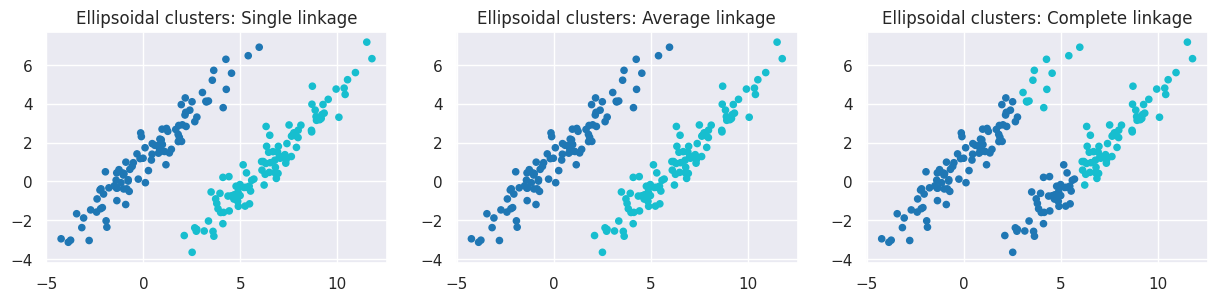

In [ ]:
X_filtered = X[X[:, 1] > -5]
x_d = pdist(X_filtered, metric='euclidean')
x_es = linkage(x_d, method='single')
x_ea = linkage(x_d, method='average')
x_ec = linkage(x_d, method='complete')
k=2
cluster_es = cut_tree(x_es, n_clusters=k).flatten()
cluster_ea = cut_tree(x_ea, n_clusters=k).flatten()
cluster_ec = cut_tree(x_ec, n_clusters=k).flatten()

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].scatter(X_filtered[:,0], X_filtered[:,1], c=cluster_es+1, s=20, cmap='tab10')
axs[0].set_title("Ellipsoidal clusters: Single linkage")
axs[1].scatter(X_filtered[:,0], X_filtered[:,1], c=cluster_ea+1, s=20, cmap='tab10')
axs[1].set_title("Ellipsoidal clusters: Average linkage")
axs[2].scatter(X_filtered[:,0], X_filtered[:,1], c=cluster_ec+1, s=20, cmap='tab10')
axs[2].set_title("Ellipsoidal clusters: Complete linkage")
for ax in axs:
    ax.set_aspect('equal', adjustable='box')
plt.show()

## Earthquake dataset

In [ ]:
# Load the quakes dataset from R via statsmodels
quakes = sm.datasets.get_rdataset("quakes", "datasets").data
Q = quakes.iloc[:, :2].copy()
Q['depth'] = -quakes.iloc[:, 2] / 100
print(Q.head())

     lat    long  depth
0 -20.42  181.62  -5.62
1 -20.62  181.03  -6.50
2 -26.00  184.10  -0.42
3 -17.97  181.66  -6.26
4 -20.42  181.96  -6.49


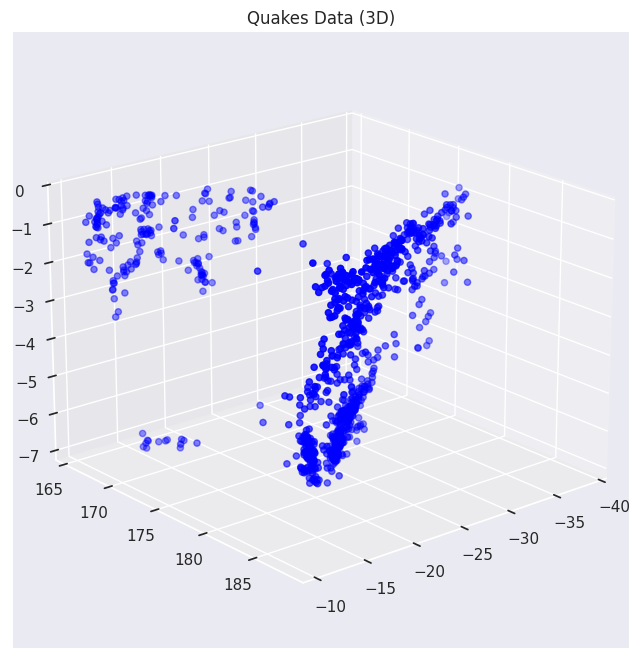

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Q.iloc[:,0], Q.iloc[:,1], Q['depth'], c='blue', s=20)
ax.set_title("Quakes Data (3D)")
ax.view_init(elev=20, azim=50)
plt.show()

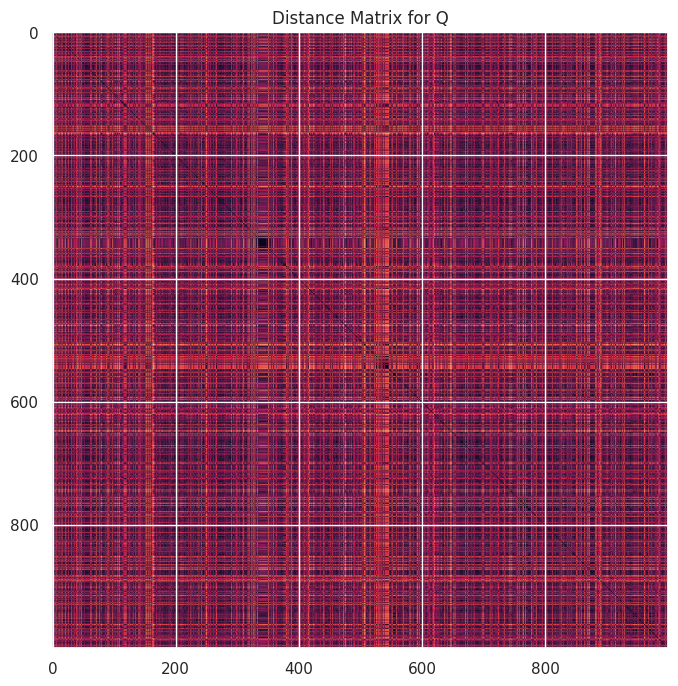

In [ ]:
d_Q = pdist(Q.values, metric='euclidean')
plt.imshow(squareform(d_Q), aspect='equal')
plt.title("Distance Matrix for Q")
plt.show()

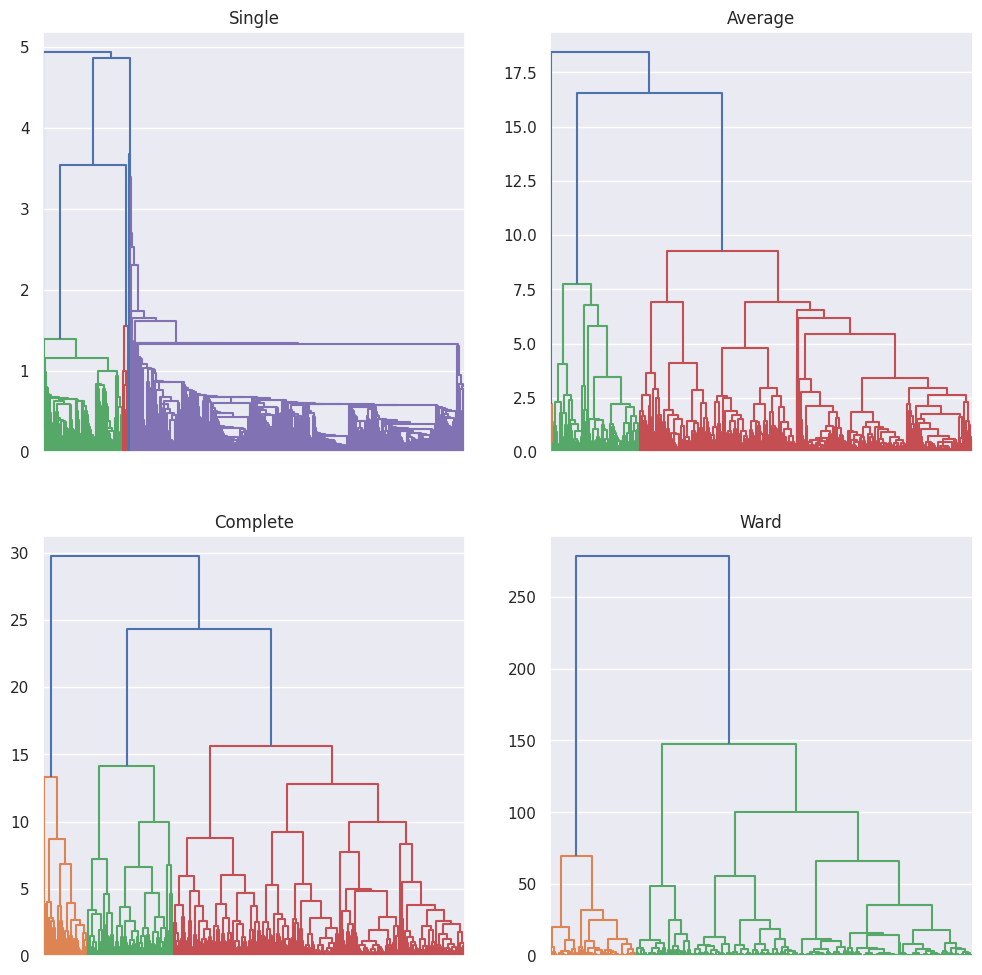

In [ ]:
# Hierarchical clustering on Q:
clusts = linkage(d_Q, method='single')
clusta = linkage(d_Q, method='average')
clustc = linkage(d_Q, method='complete')
clustw = linkage(d_Q, method='ward')  # ward.D2 in R corresponds to Ward's method in scipy

fig, axs = plt.subplots(2, 2, figsize=(12,12))
dendrogram(clusts, ax=axs[0,0], no_labels=True)
axs[0,0].set_title("Single")
dendrogram(clusta, ax=axs[0,1], no_labels=True)
axs[0,1].set_title("Average")
dendrogram(clustc, ax=axs[1,0], no_labels=True)
axs[1,0].set_title("Complete")
dendrogram(clustw, ax=axs[1,1], no_labels=True)
axs[1,1].set_title("Ward")
plt.show()

Ward linkage choose the pair of clusters that once merged causes the smallest increase in WSS.

It avoids "chaining" seen in single linkage (where clusters can be stretched out).
It produces compact, spherical clusters.
It balances cluster sizes, unlike complete linkage, which might create clusters of very different sizes. It is more computational expensive.

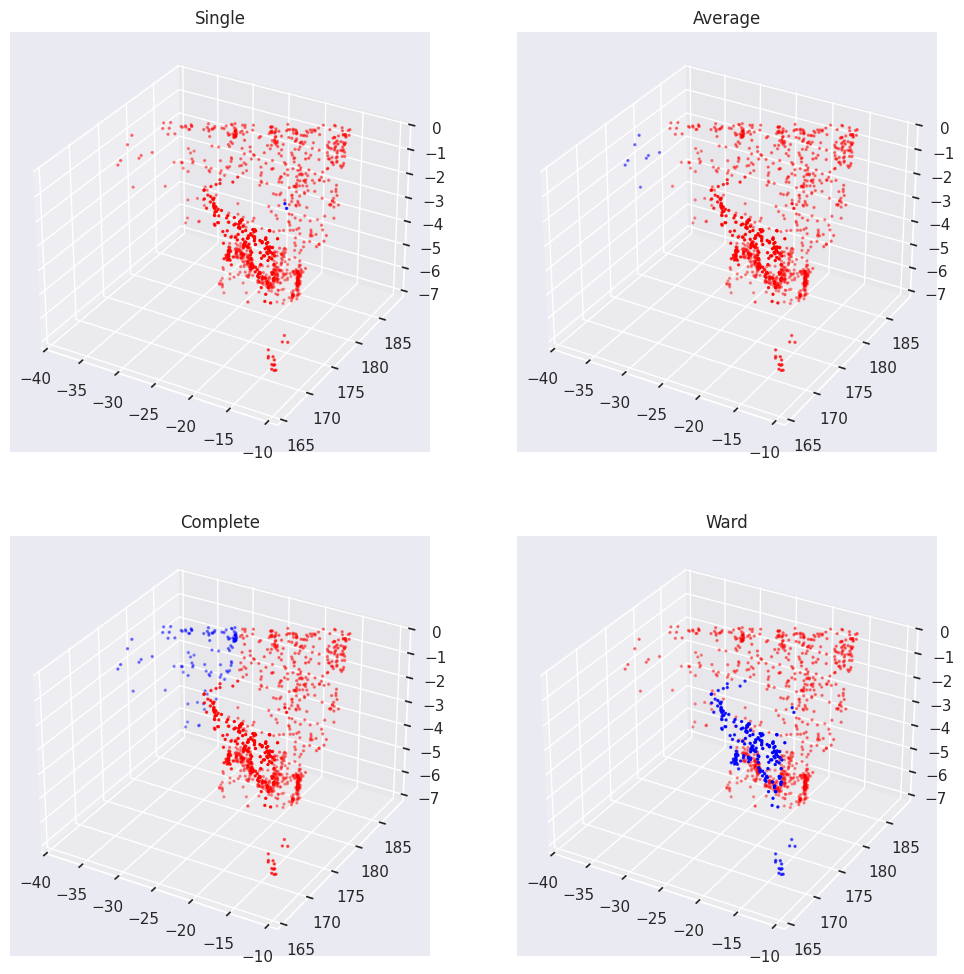

In [ ]:

## TODO: compare hierarchical clustering with 2 and 3 clusters with all linkage methods, including ward

sing = cut_tree(clusts, n_clusters=2).flatten()
ae = cut_tree(clusta, n_clusters=2).flatten()
ac = cut_tree(clustc, n_clusters=2).flatten()
aw = cut_tree(clustw, n_clusters=2).flatten()

fig, axs = plt.subplots(2, 2, figsize=(12,12), subplot_kw={'projection': '3d'}) # Create 3D subplots
axs[0,0].scatter(Q.iloc[:,0], Q.iloc[:,1], Q.iloc[:,2], c=np.where(sing==0, 'red','blue'), s=2)
axs[0,0].set_title("Single")
axs[0,1].scatter(Q.iloc[:,0], Q.iloc[:,1], Q.iloc[:,2], c=np.where(ae==0, 'red','blue'), s=2)
axs[0,1].set_title("Average")
axs[1,0].scatter(Q.iloc[:,0], Q.iloc[:,1], Q.iloc[:,2], c=np.where(ac==0, 'red','blue'), s=2)
axs[1,0].set_title("Complete")
axs[1,1].scatter(Q.iloc[:,0], Q.iloc[:,1], Q.iloc[:,2], c=np.where(aw==0, 'red','blue'), s=2)
axs[1,1].set_title("Ward")
plt.show()

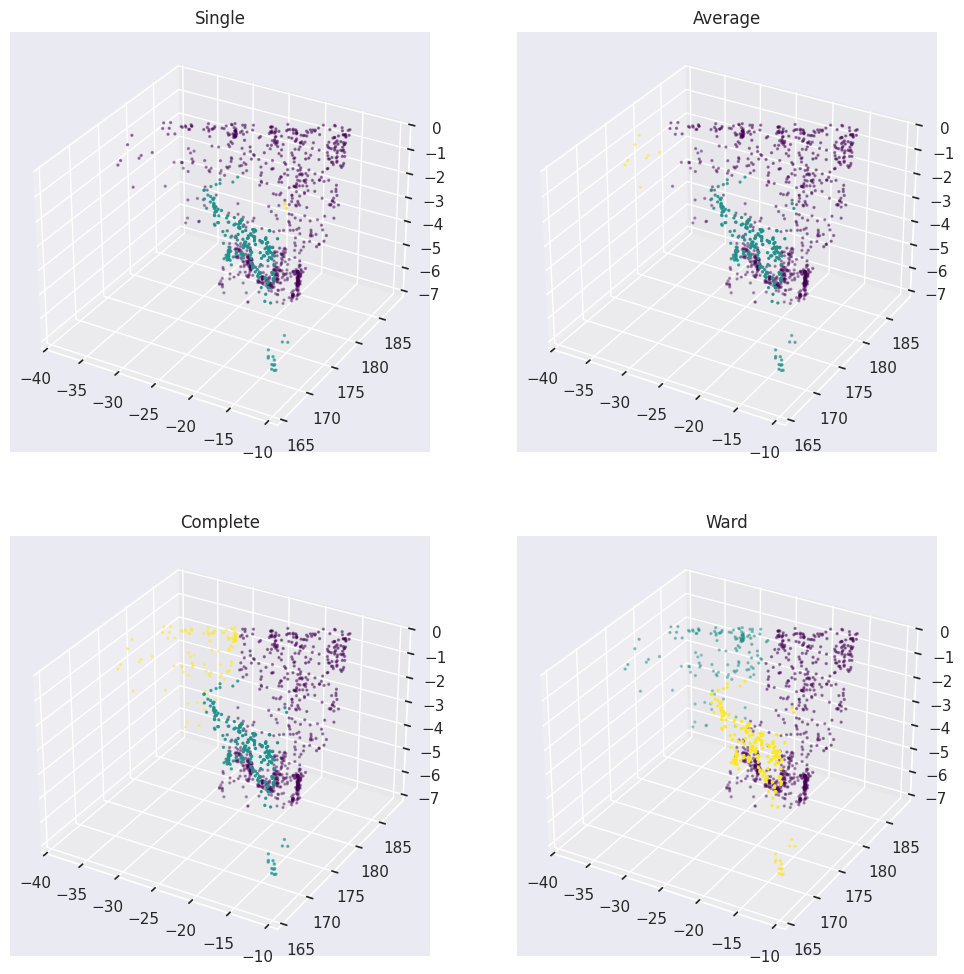

In [ ]:
# TODO: compare hierarchical3 clusters with all linkage methods, including ward

sing = cut_tree(clusts, n_clusters=3).flatten()
ae = cut_tree(clusta, n_clusters=3).flatten()
ac = cut_tree(clustc, n_clusters=3).flatten()
aw = cut_tree(clustw, n_clusters=3).flatten()

fig, axs = plt.subplots(2, 2, figsize=(12,12), subplot_kw={'projection': '3d'}) # Create 3D subplots
axs[0,0].scatter(Q.iloc[:,0], Q.iloc[:,1], Q.iloc[:,2], c=sing, cmap = 'viridis', s=2)
axs[0,0].set_title("Single")
axs[0,1].scatter(Q.iloc[:,0], Q.iloc[:,1], Q.iloc[:,2], c=ae, cmap = 'viridis', s=2)
axs[0,1].set_title("Average")
axs[1,0].scatter(Q.iloc[:,0], Q.iloc[:,1], Q.iloc[:,2], c=ac, cmap = 'viridis', s=2)
axs[1,0].set_title("Complete")
axs[1,1].scatter(Q.iloc[:,0], Q.iloc[:,1], Q.iloc[:,2], c=aw, cmap = 'viridis', s=2)
axs[1,1].set_title("Ward")
plt.show()